In [62]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [63]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/rutikhatim/Assignment/main/Multi%20Linear%20Regression/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [64]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [65]:
df.drop(columns=["State"],inplace=True)

In [66]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [67]:
#Data visualization

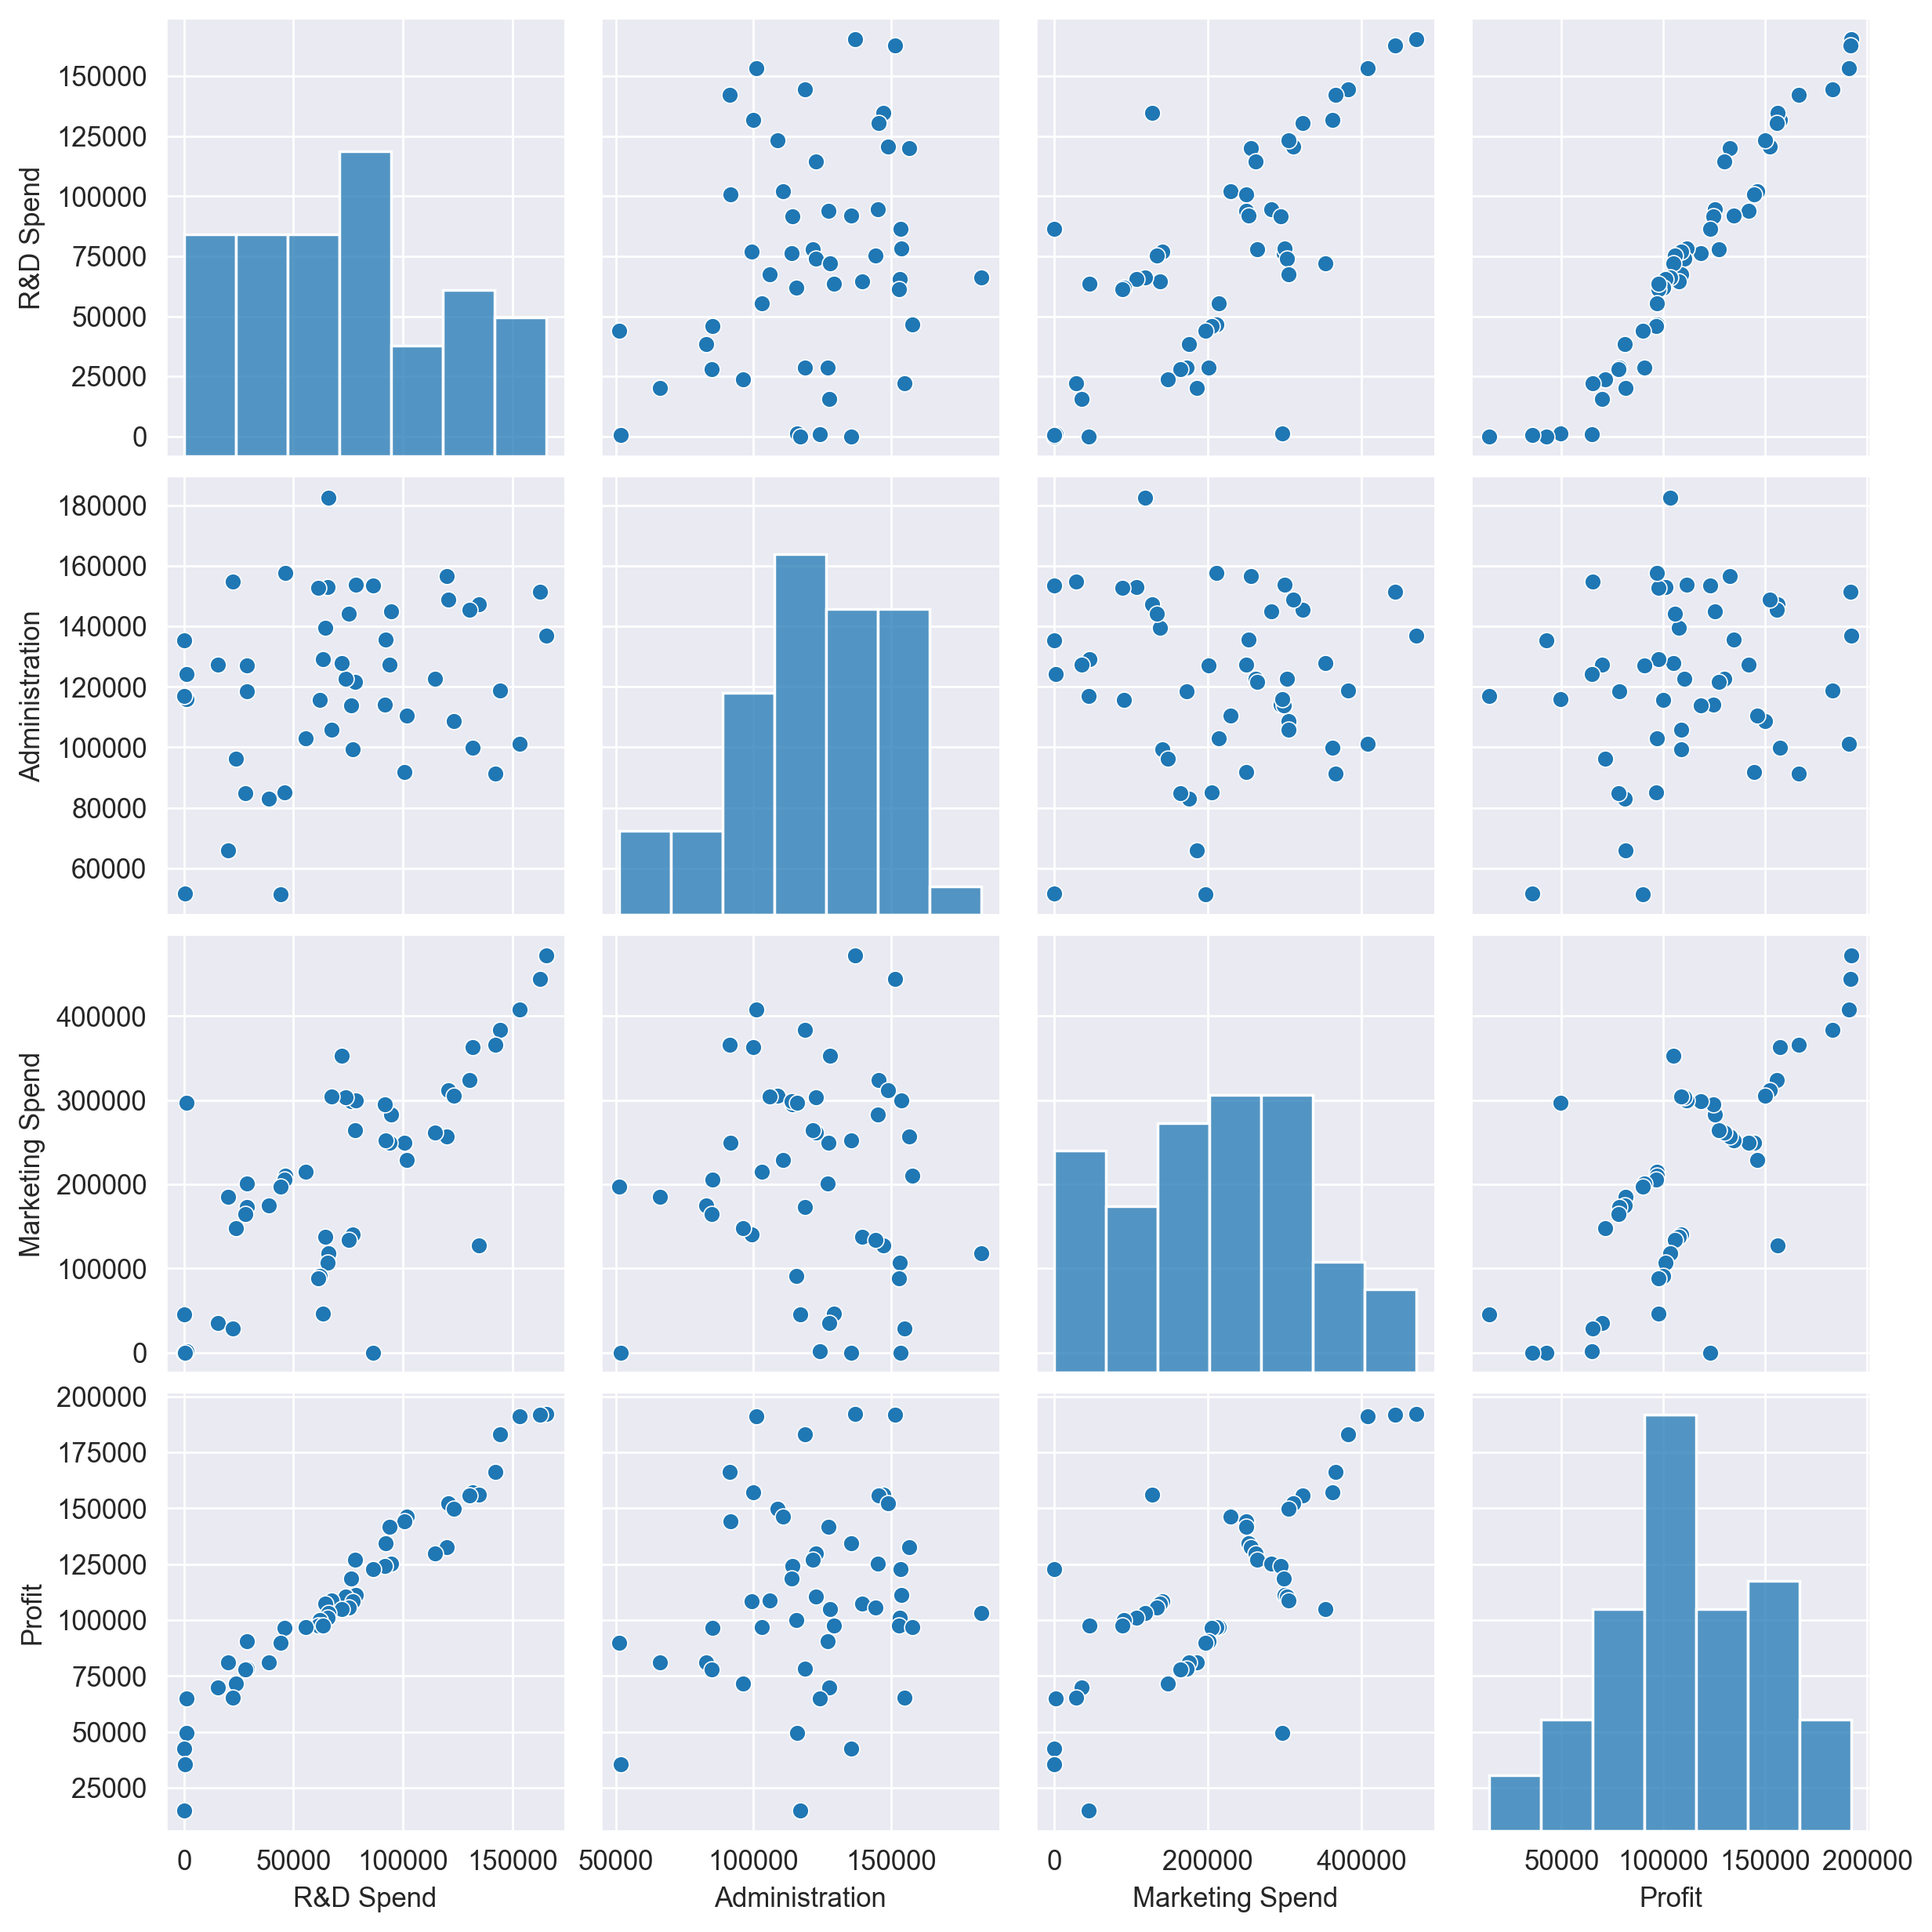

In [68]:
sns.pairplot(df)

In [69]:
#Correlation

<Axes: >

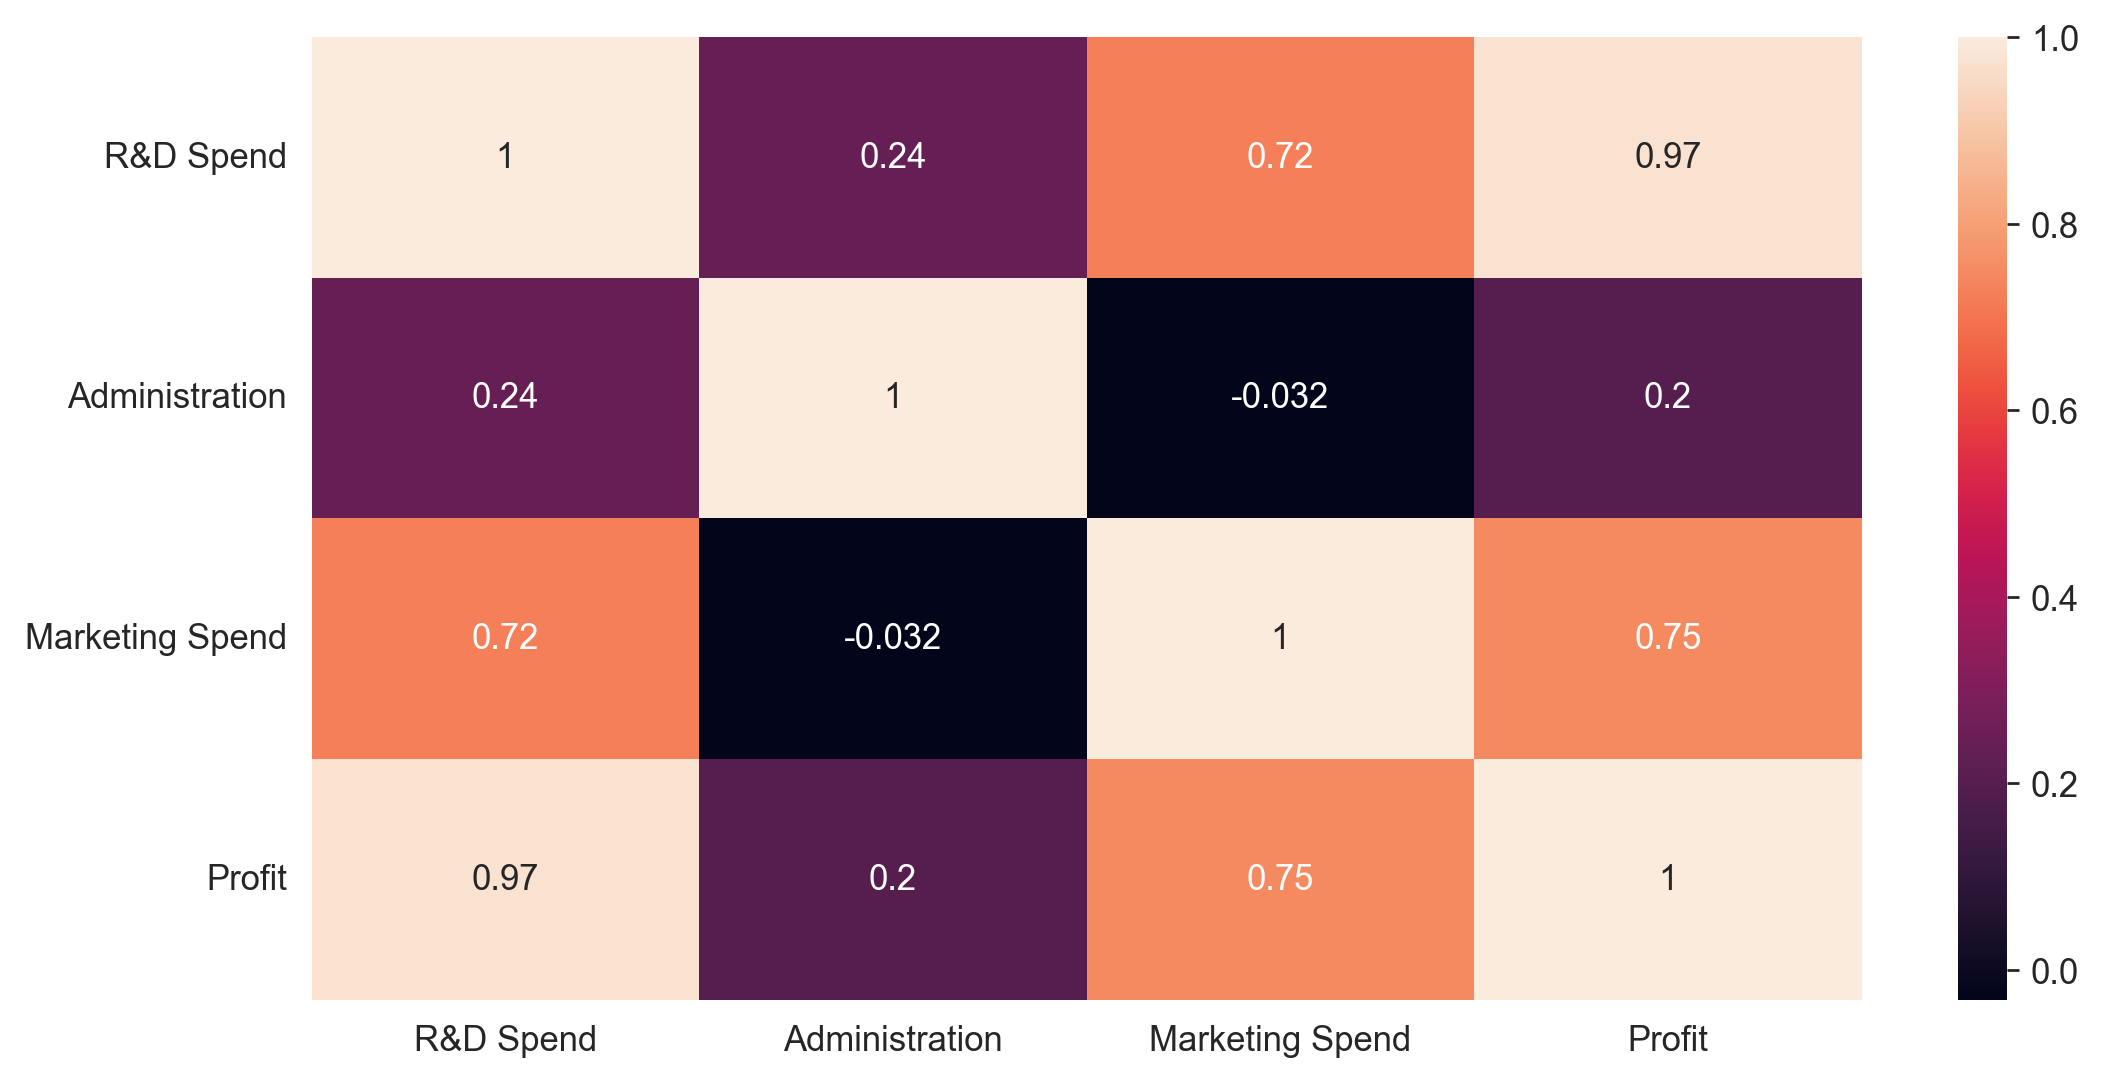

In [70]:
sns.heatmap(df.corr(),annot=True)

In [71]:
df.rename(columns={"R&D Spend":"RD_Spend","Marketing Spend":"Marketing_Spend"},inplace=True)

In [72]:
df

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model Building

In [73]:
import statsmodels.formula.api as smf


In [74]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df).fit()

In [75]:
model.pvalues

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

# Simple Linear Regression

In [76]:
#r&d spend
rd_spend = smf.ols('Profit~RD_Spend+Administration',data = df).fit()
rd_spend.pvalues

Intercept         5.695336e-12
RD_Spend          2.278348e-31
Administration    2.888932e-01
dtype: float64

In [77]:
#Marketing spend
marketing_spend = smf.ols('Profit~Marketing_Spend+Administration',data =df).fit()
marketing_spend.pvalues

Intercept          2.589341e-01
Marketing_Spend    9.727245e-11
Administration     1.729198e-02
dtype: float64

# Calculate VIF

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [80]:
data = df.drop(columns=['Profit'])
data

,RD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [81]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [82]:
vif = pd.DataFrame()
vif

""


In [83]:
vif['Features'] = data.columns
vif

,Features
0,RD_Spend
1,Administration
2,Marketing_Spend


In [84]:
range(len(data.columns))

range(0, 3)

In [85]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [86]:
vif

,Features,VIF
0,RD_Spend,8.384571
1,Administration,4.026406
2,Marketing_Spend,7.593984


# Subset Selection

AIC

In [128]:
#R&D Spend and Marketing Spend
both_spend = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data = df).fit()
both_spend.rsquared, both_spend.aic

(0.9603996030027453, 973.6784409946897)

In [87]:
#R&D Spend
rd_spend = smf.ols('Profit~RD_Spend+Administration',data = df).fit()
rd_spend.rsquared, rd_spend.aic

(0.9478129385009173, 1059.6636934567293)

In [88]:
#Marketing Spend
marketing_spend = smf.ols('Profit~Marketing_Spend+Administration',data = df).fit()
marketing_spend.rsquared, marketing_spend.aic

(0.6097229746770663, 1160.2648038638672)

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis

In [89]:
model = smf.ols('Profit~RD_Spend+Administration', data=df).fit()
model.rsquared

0.9478129385009173

In [90]:
#Statsmodel
import statsmodels.api as sm

In [91]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [92]:
model.resid

0      2079.649486
1      4749.359826
2      9239.337178
3      9838.385168
4     -6368.626886
5     -6299.223299
6     -7017.651084
7     -3753.952582
8      1284.700786
9     -5696.378405
10     9235.213563
11     7446.155824
12    12524.671567
13     7293.055893
14   -17392.896004
15   -17204.311290
16    11293.919422
17    -3433.440974
18    -3667.525602
19     1521.808934
20     3882.032537
21    -3005.282643
22    -1819.486192
23     1230.682686
24    -7494.149233
25     4164.790343
26    -6456.905185
27    -5267.331867
28     1130.936860
29    -2331.644260
30    -2267.126777
31    -2017.328718
32    -5276.649740
33     -488.456385
34    10158.487187
35     6430.501317
36    17843.425291
37     -213.204647
38    12397.085184
39    -2725.173594
40     4846.063661
41     3354.505431
42     1328.209595
43     8255.270786
44     -602.100738
45    15756.687083
46     -392.222274
47    -5149.882512
48   -16938.371096
49   -34005.613622
dtype: float64

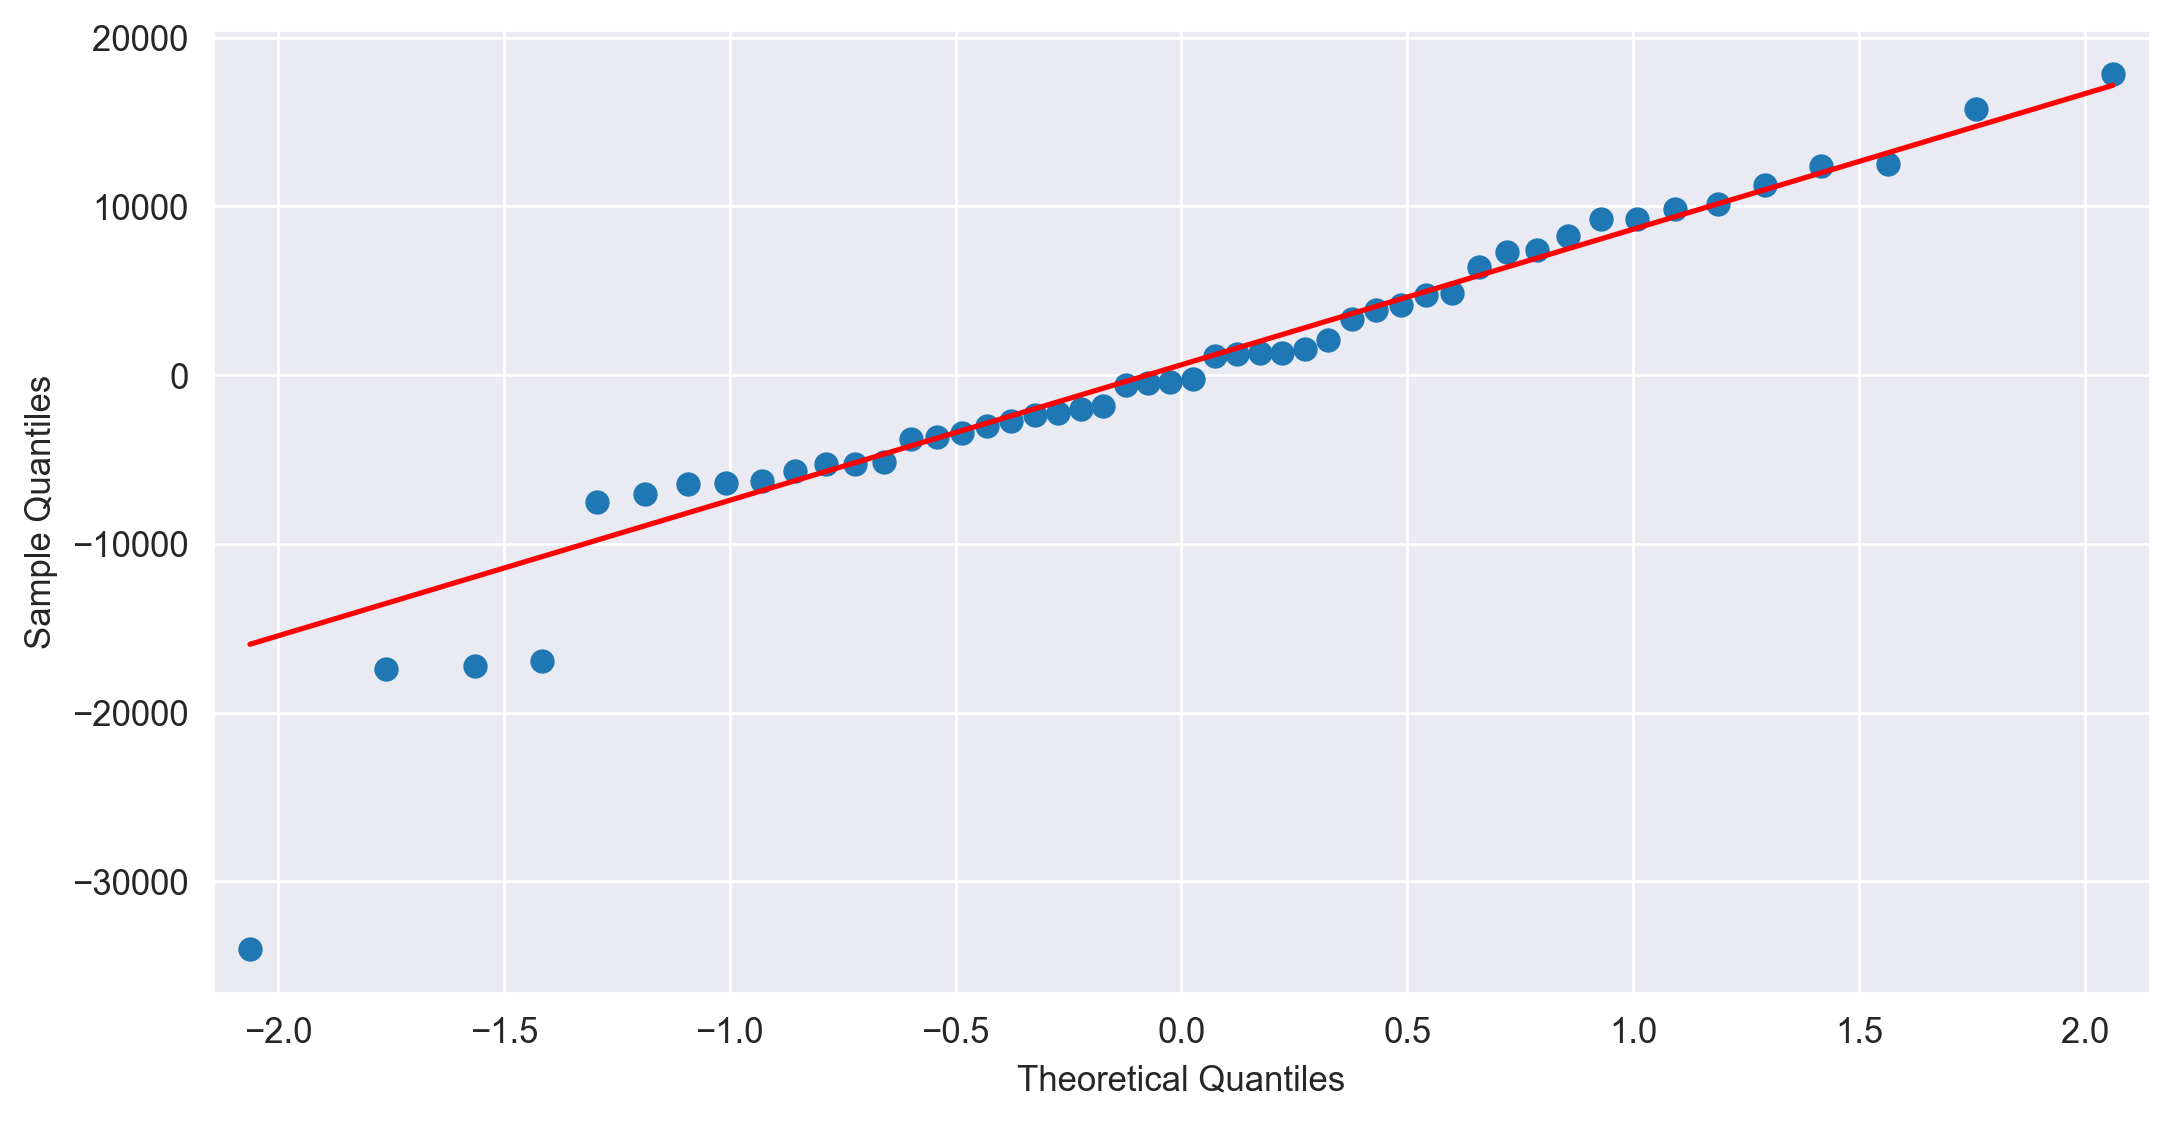

In [93]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [94]:
#get index for higher residuals

In [95]:
np.argmax(model.resid), np.max(model.resid)

(36, 17843.425290701358)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [96]:
model.fittedvalues, model.resid

(0     190182.180514
 1     187042.700174
 2     181811.052822
 3     173063.604832
 4     172556.566886
 5     163290.343299
 6     163140.161084
 7     159506.552582
 8     150927.069214
 9     155456.338405
 10    136886.736437
 11    136813.244176
 12    129060.848433
 13    127014.294107
 14    149995.546004
 15    147121.351290
 16    115699.010578
 17    128803.810974
 18    127934.425602
 19    121255.051066
 20    114591.997463
 21    114318.302643
 22    112171.736192
 23    107503.307314
 24    116046.189233
 25    103239.549657
 26    112190.445185
 27    110275.641867
 28    102151.443140
 29    103336.284260
 30    102204.716777
 31     99500.888718
 32    102704.489740
 33     97267.376385
 34     86554.312813
 35     90049.008683
 36     72864.764709
 37     90162.344647
 38     68831.974816
 39     83730.933594
 40     73393.846339
 41     74444.324569
 42     70170.280405
 43     61503.709214
 44     65802.430738
 45     49169.392917
 46     49882.972274
 47     47709

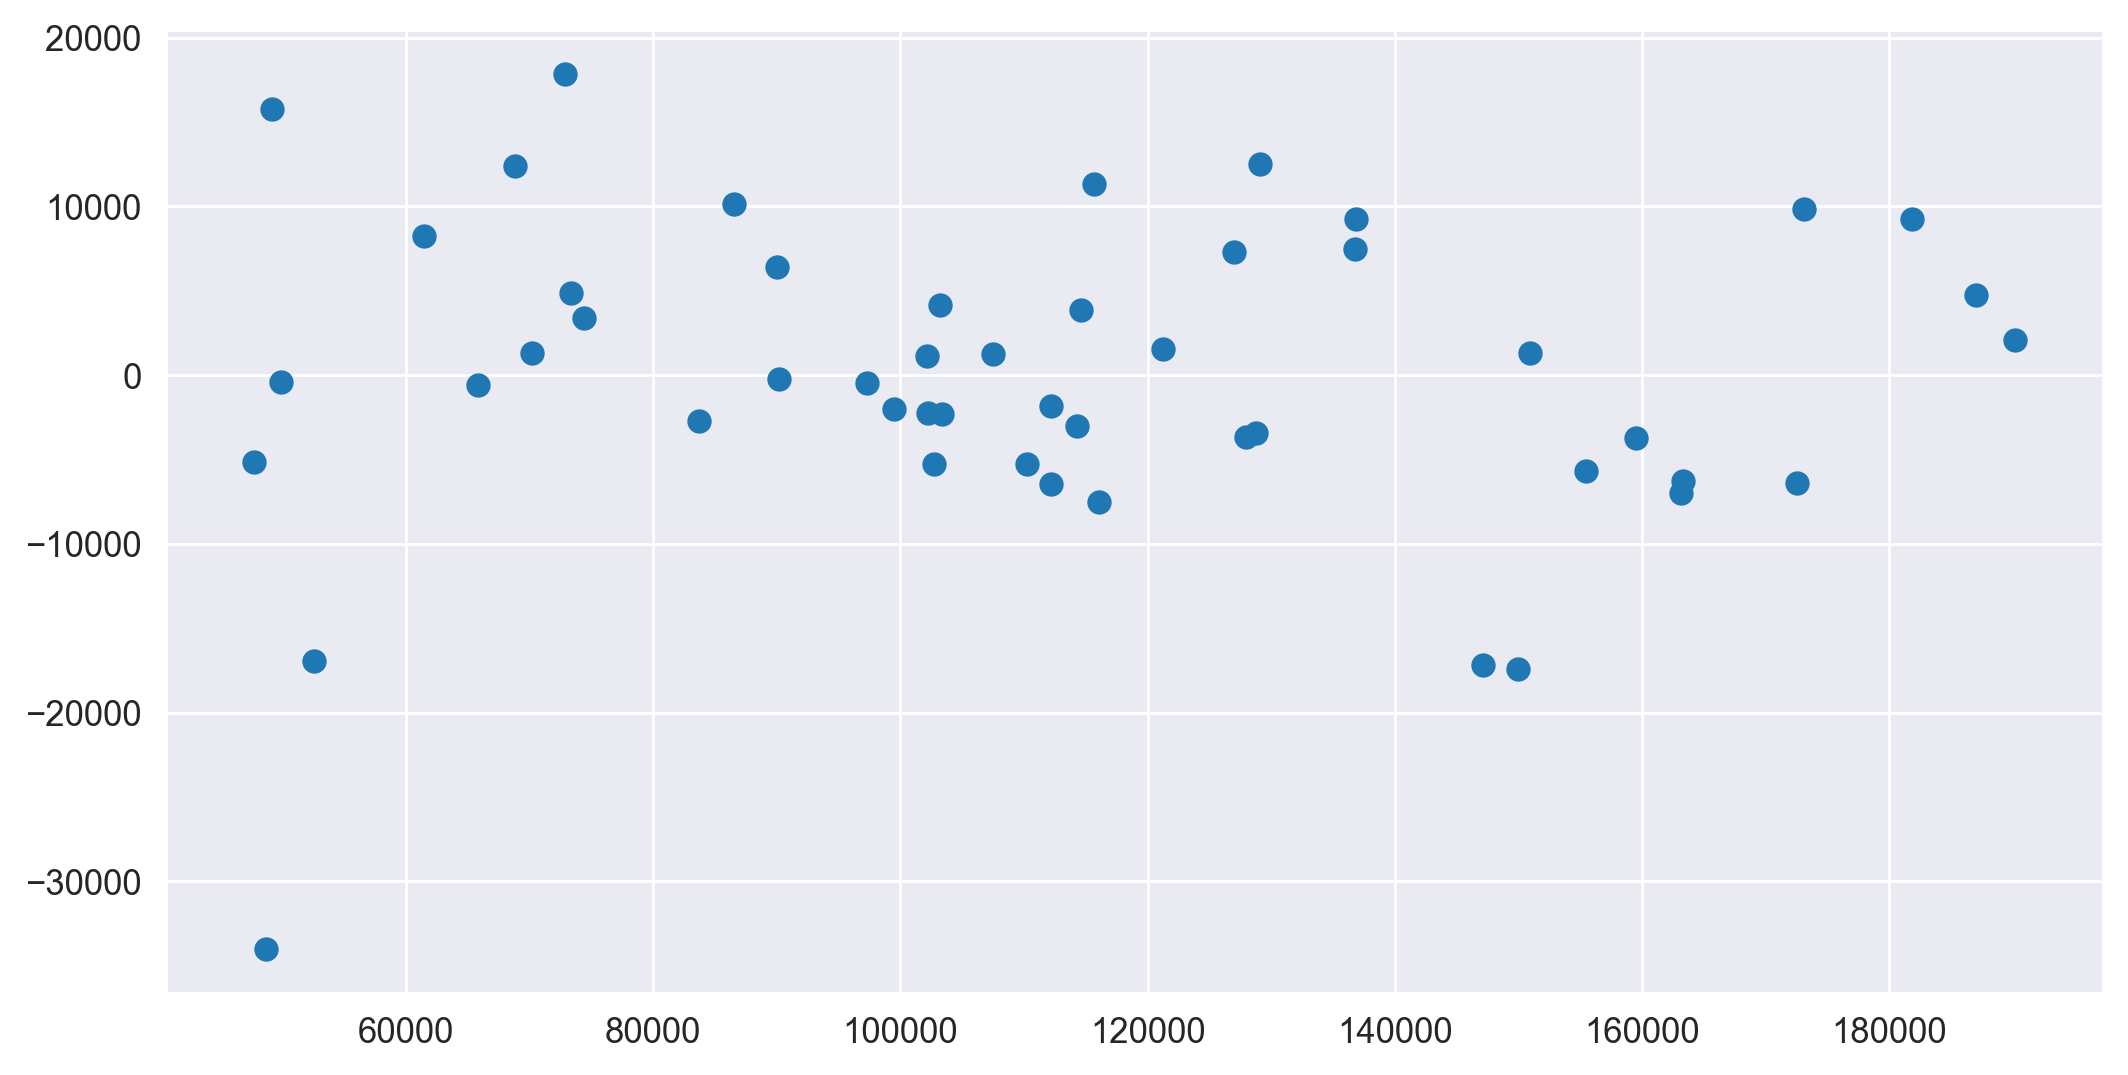

In [97]:
plt.scatter(model.fittedvalues, model.resid)

# 3.Residual VS Regressor

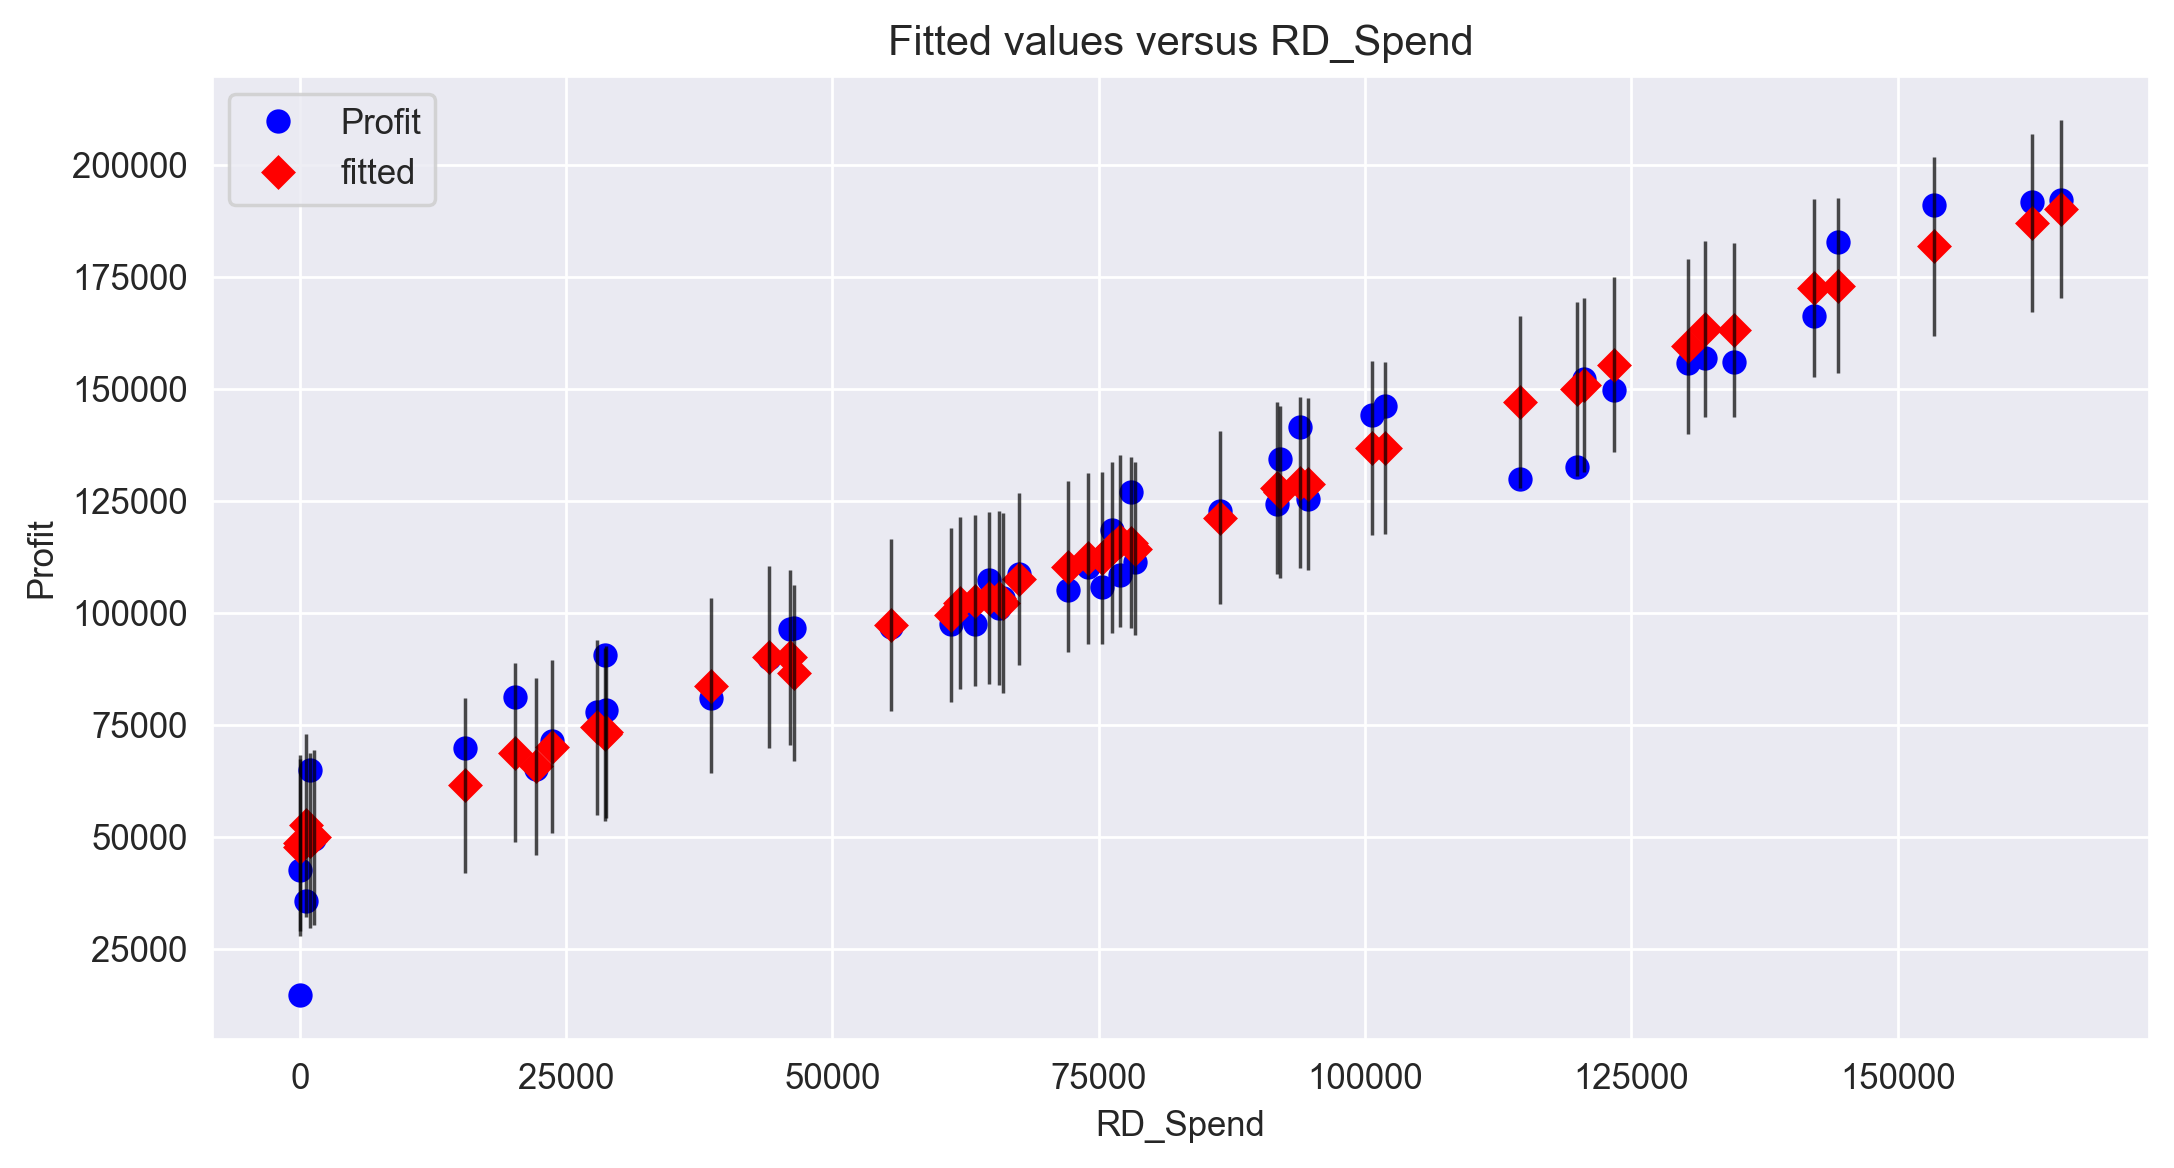

In [98]:
#R&D_spend
sm.graphics.plot_fit(model,'RD_Spend');

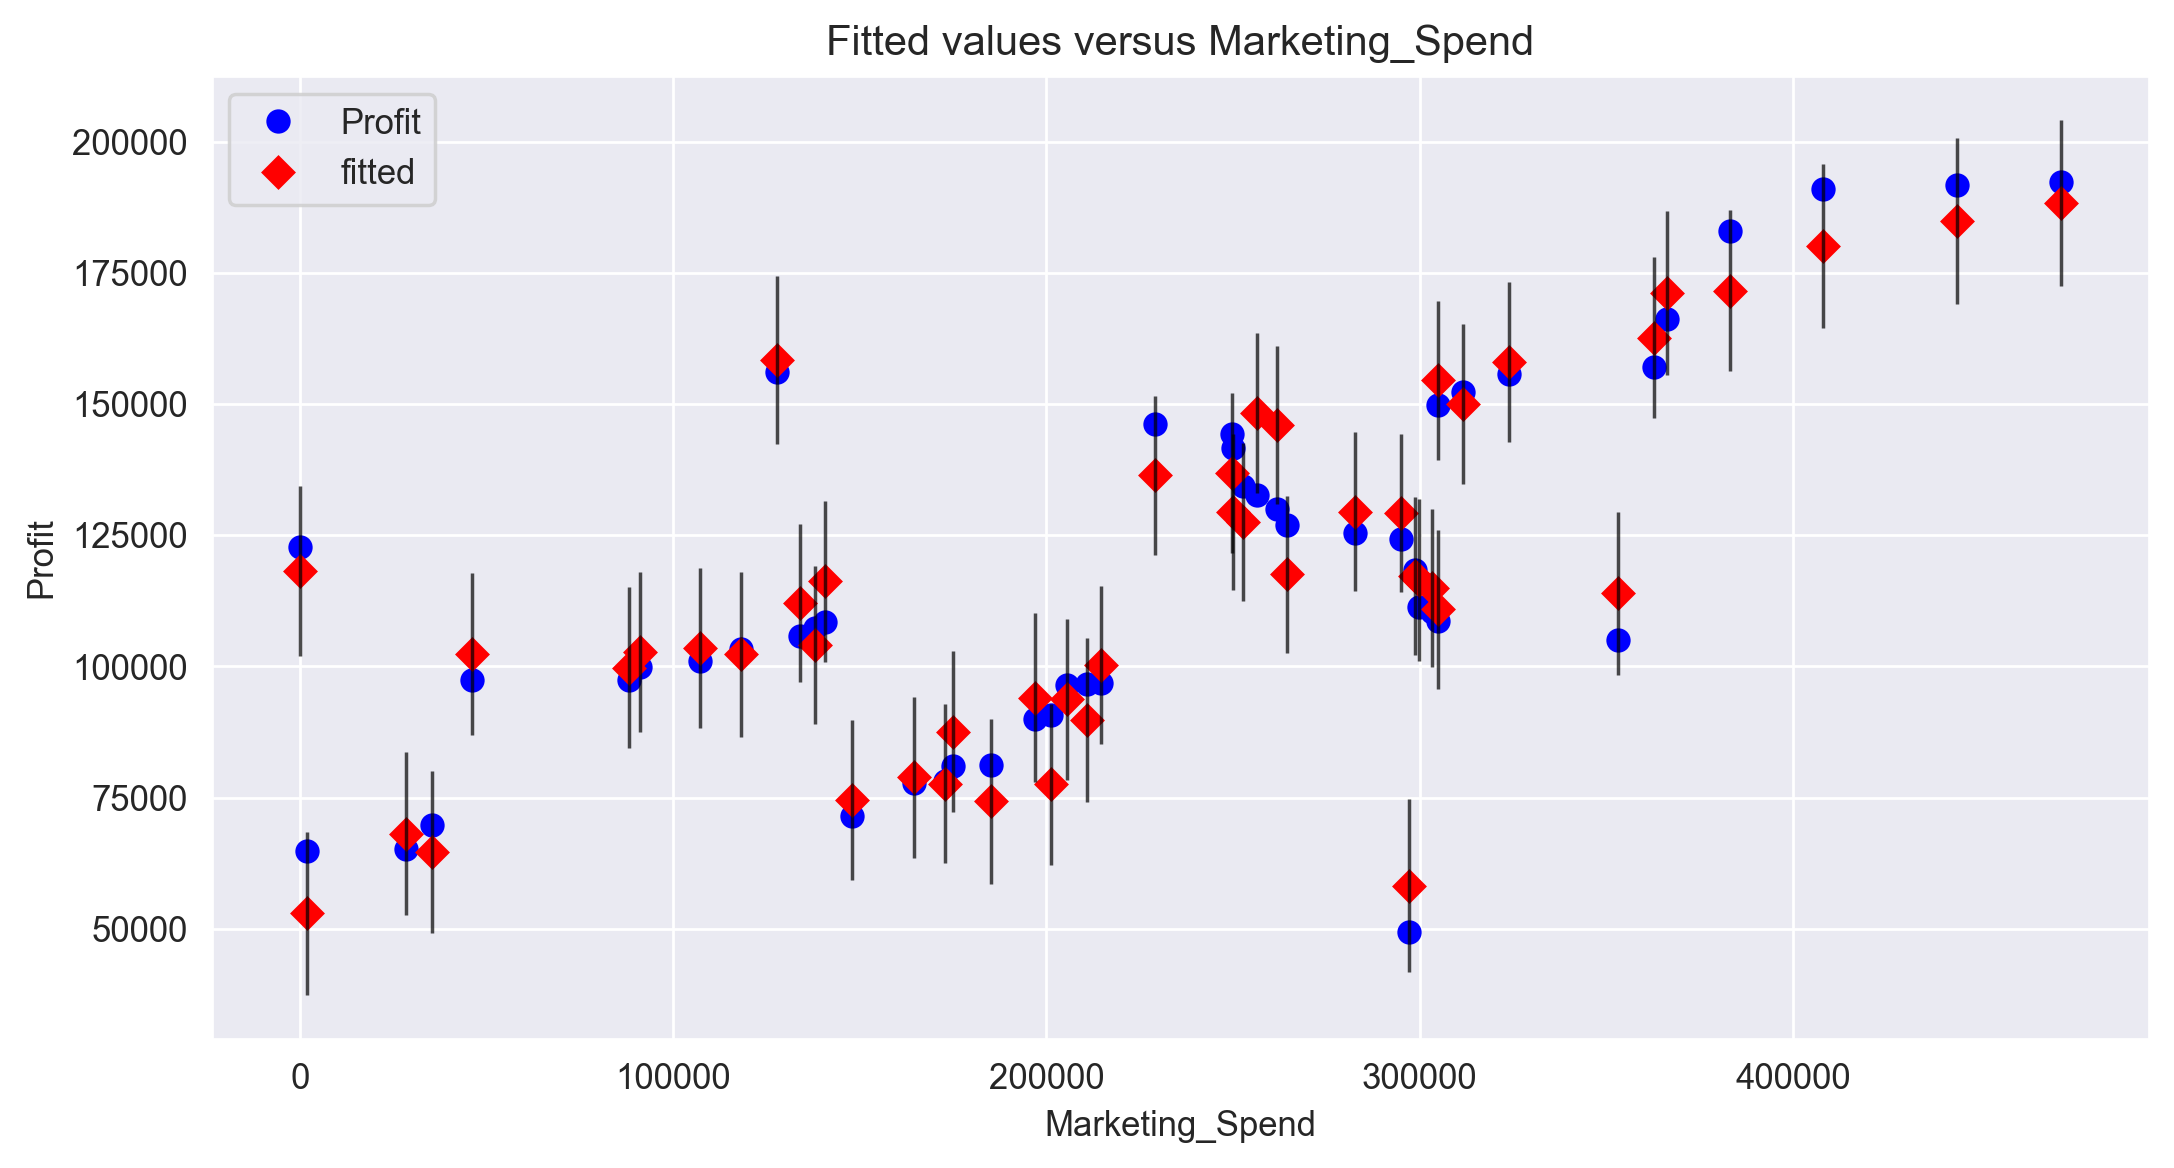

In [124]:
#Marketing Spend
sm.graphics.plot_fit(model,"Marketing_Spend");

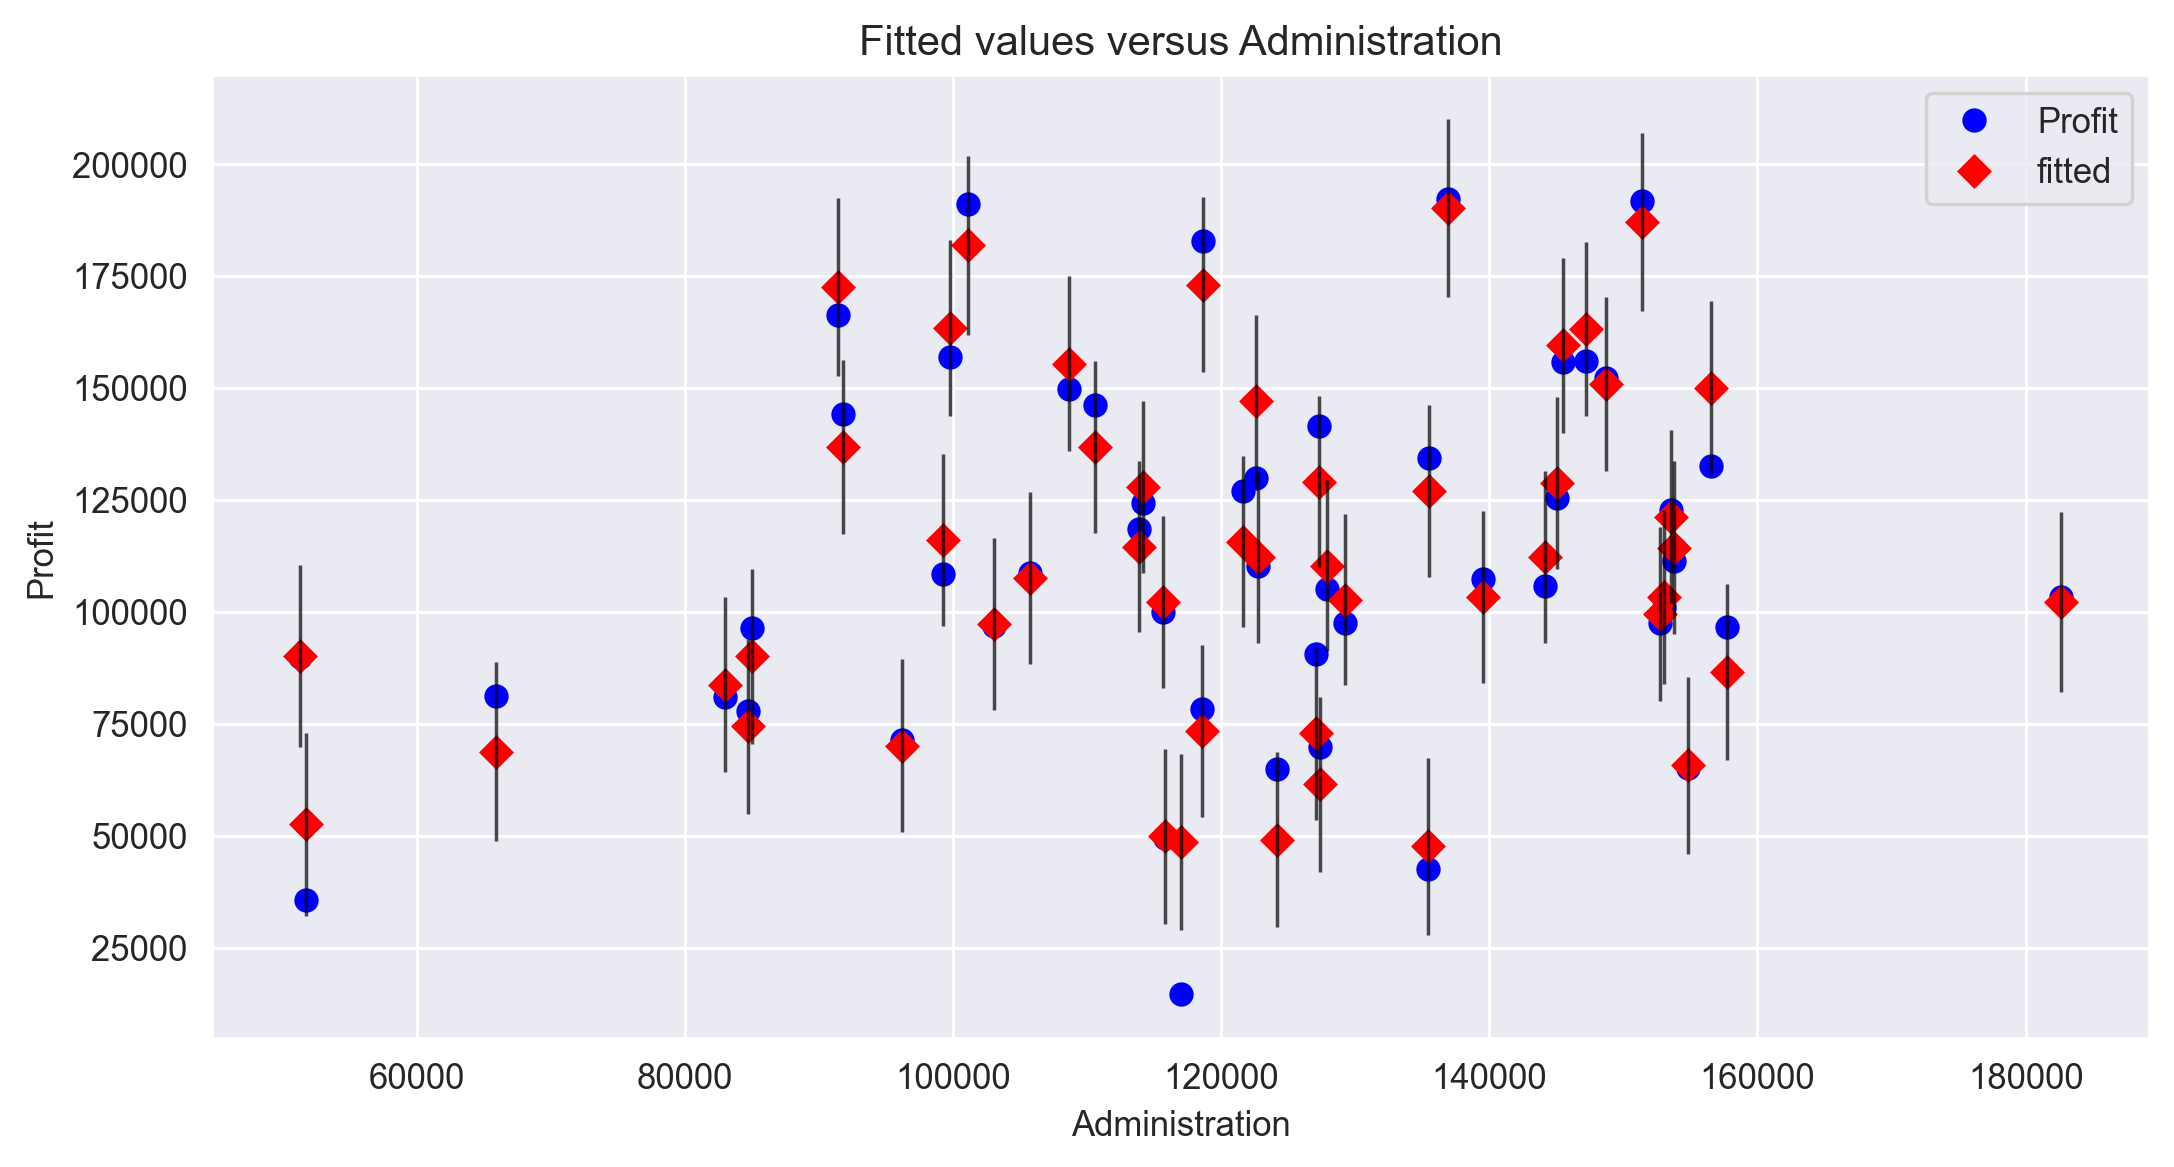

In [100]:
#Marketing Spend
sm.graphics.plot_fit(model,'Administration');

# MODEL DELETION TECHNIQUES

# Cook's Distance

In [101]:
model

In [102]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [103]:
c

array([2.04891117e-03, 1.10719705e-02, 4.45970340e-02, 3.10535270e-02,
       2.11438476e-02, 1.36907373e-02, 1.35107805e-02, 3.46841651e-03,
       3.66234828e-04, 7.51800918e-03, 1.16600707e-02, 1.36901599e-02,
       1.50207539e-02, 5.68804702e-03, 8.17568588e-02, 4.42094438e-02,
       1.01122046e-02, 1.72273244e-03, 1.37988343e-03, 4.50957682e-04,
       1.29256181e-03, 1.80511998e-03, 2.60725721e-04, 1.58579967e-04,
       7.75429813e-03, 2.18516446e-03, 5.74156819e-03, 2.32513846e-03,
       8.13668428e-04, 1.14848791e-03, 4.40912370e-04, 8.88021449e-04,
       2.58413417e-03, 2.86214125e-05, 3.26636622e-02, 9.81464013e-03,
       5.76430905e-02, 3.48387257e-05, 8.04974487e-02, 1.98645424e-03,
       3.84314890e-03, 3.15370564e-03, 3.93186682e-04, 1.70395623e-02,
       1.53194084e-04, 8.37159585e-02, 4.81274516e-05, 1.08495170e-02,
       2.61113283e-01, 3.75268147e-01])

<StemContainer object of 3 artists>

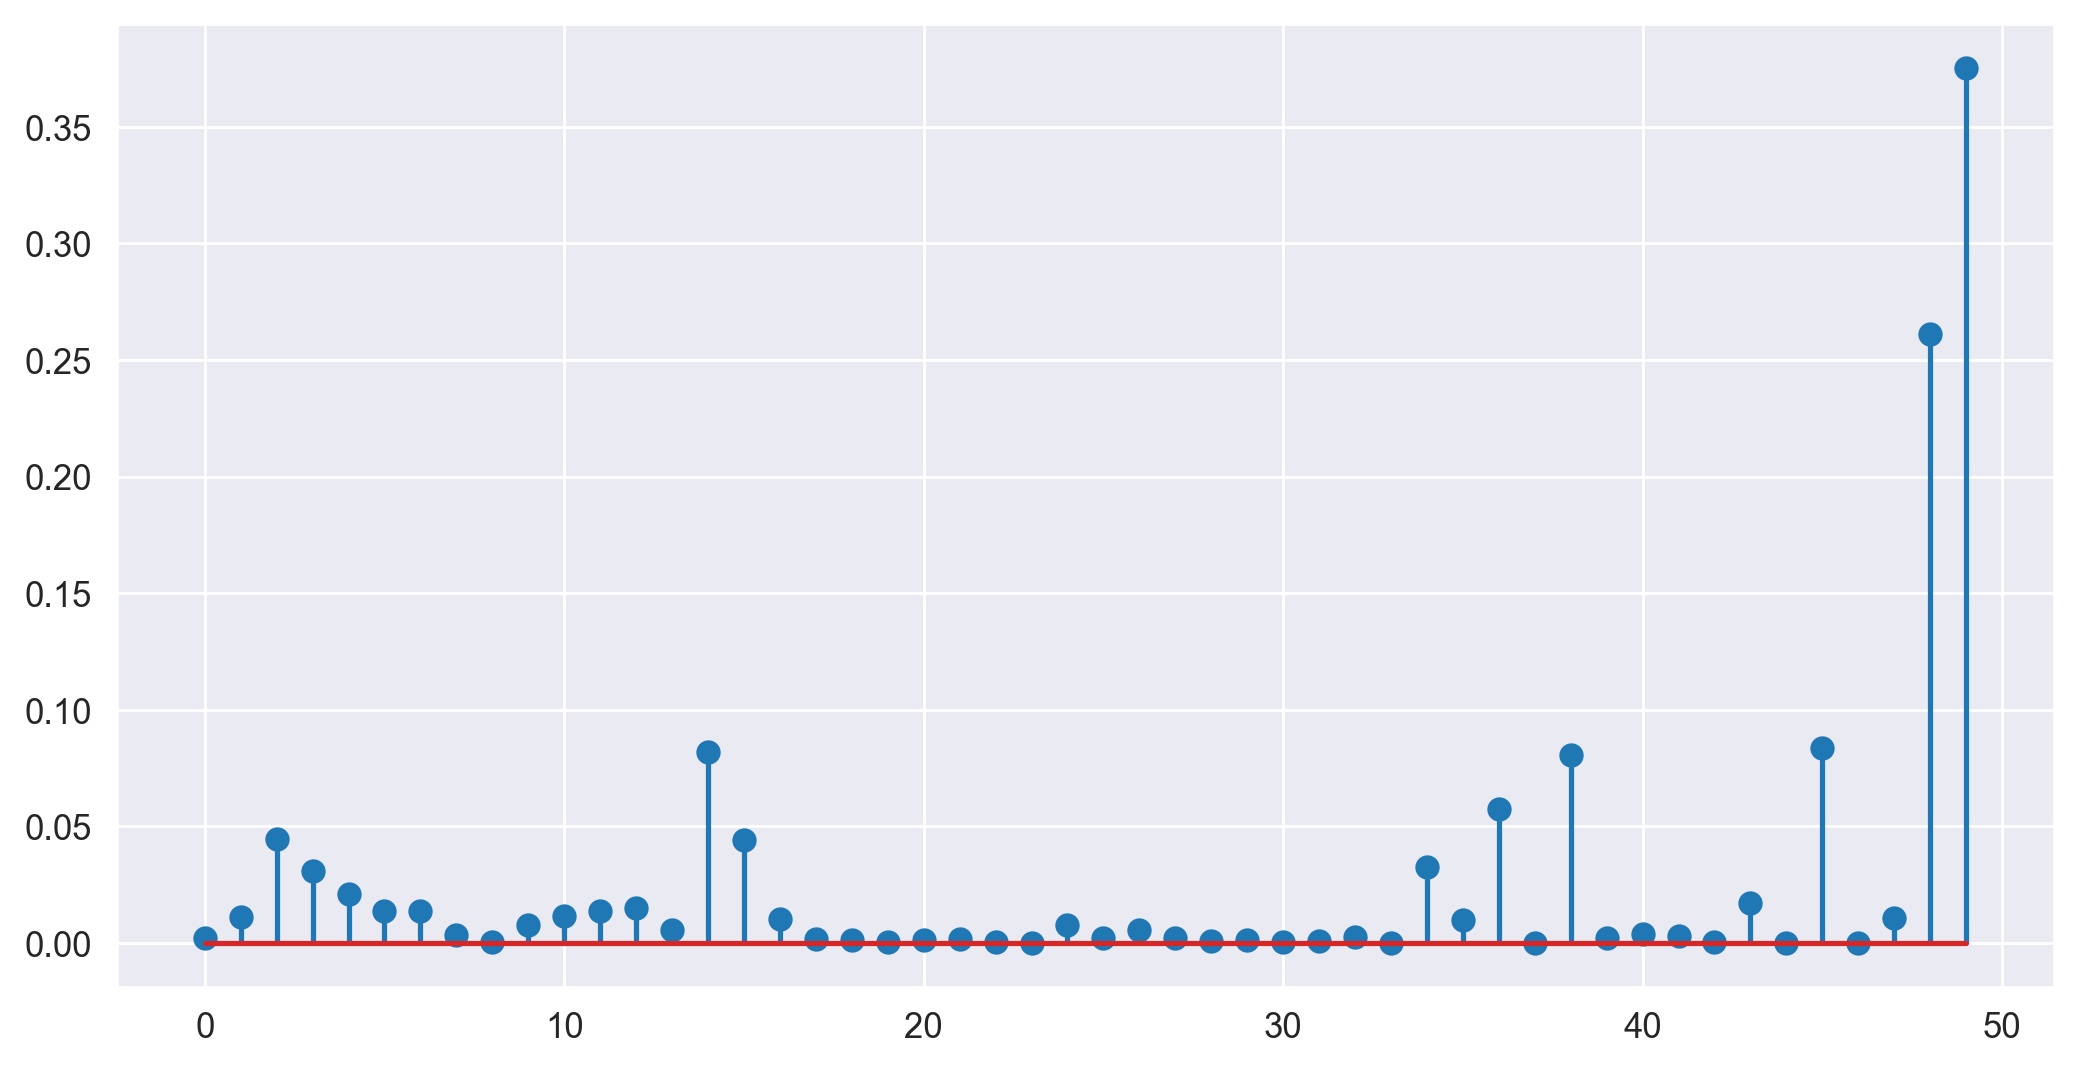

In [104]:
# Cook's distance plot
plt.stem(c)

In [105]:
np.argmax(c), np.max(c)

(49, 0.3752681465677589)

In [106]:
df.iloc[[49]]

,RD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [107]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

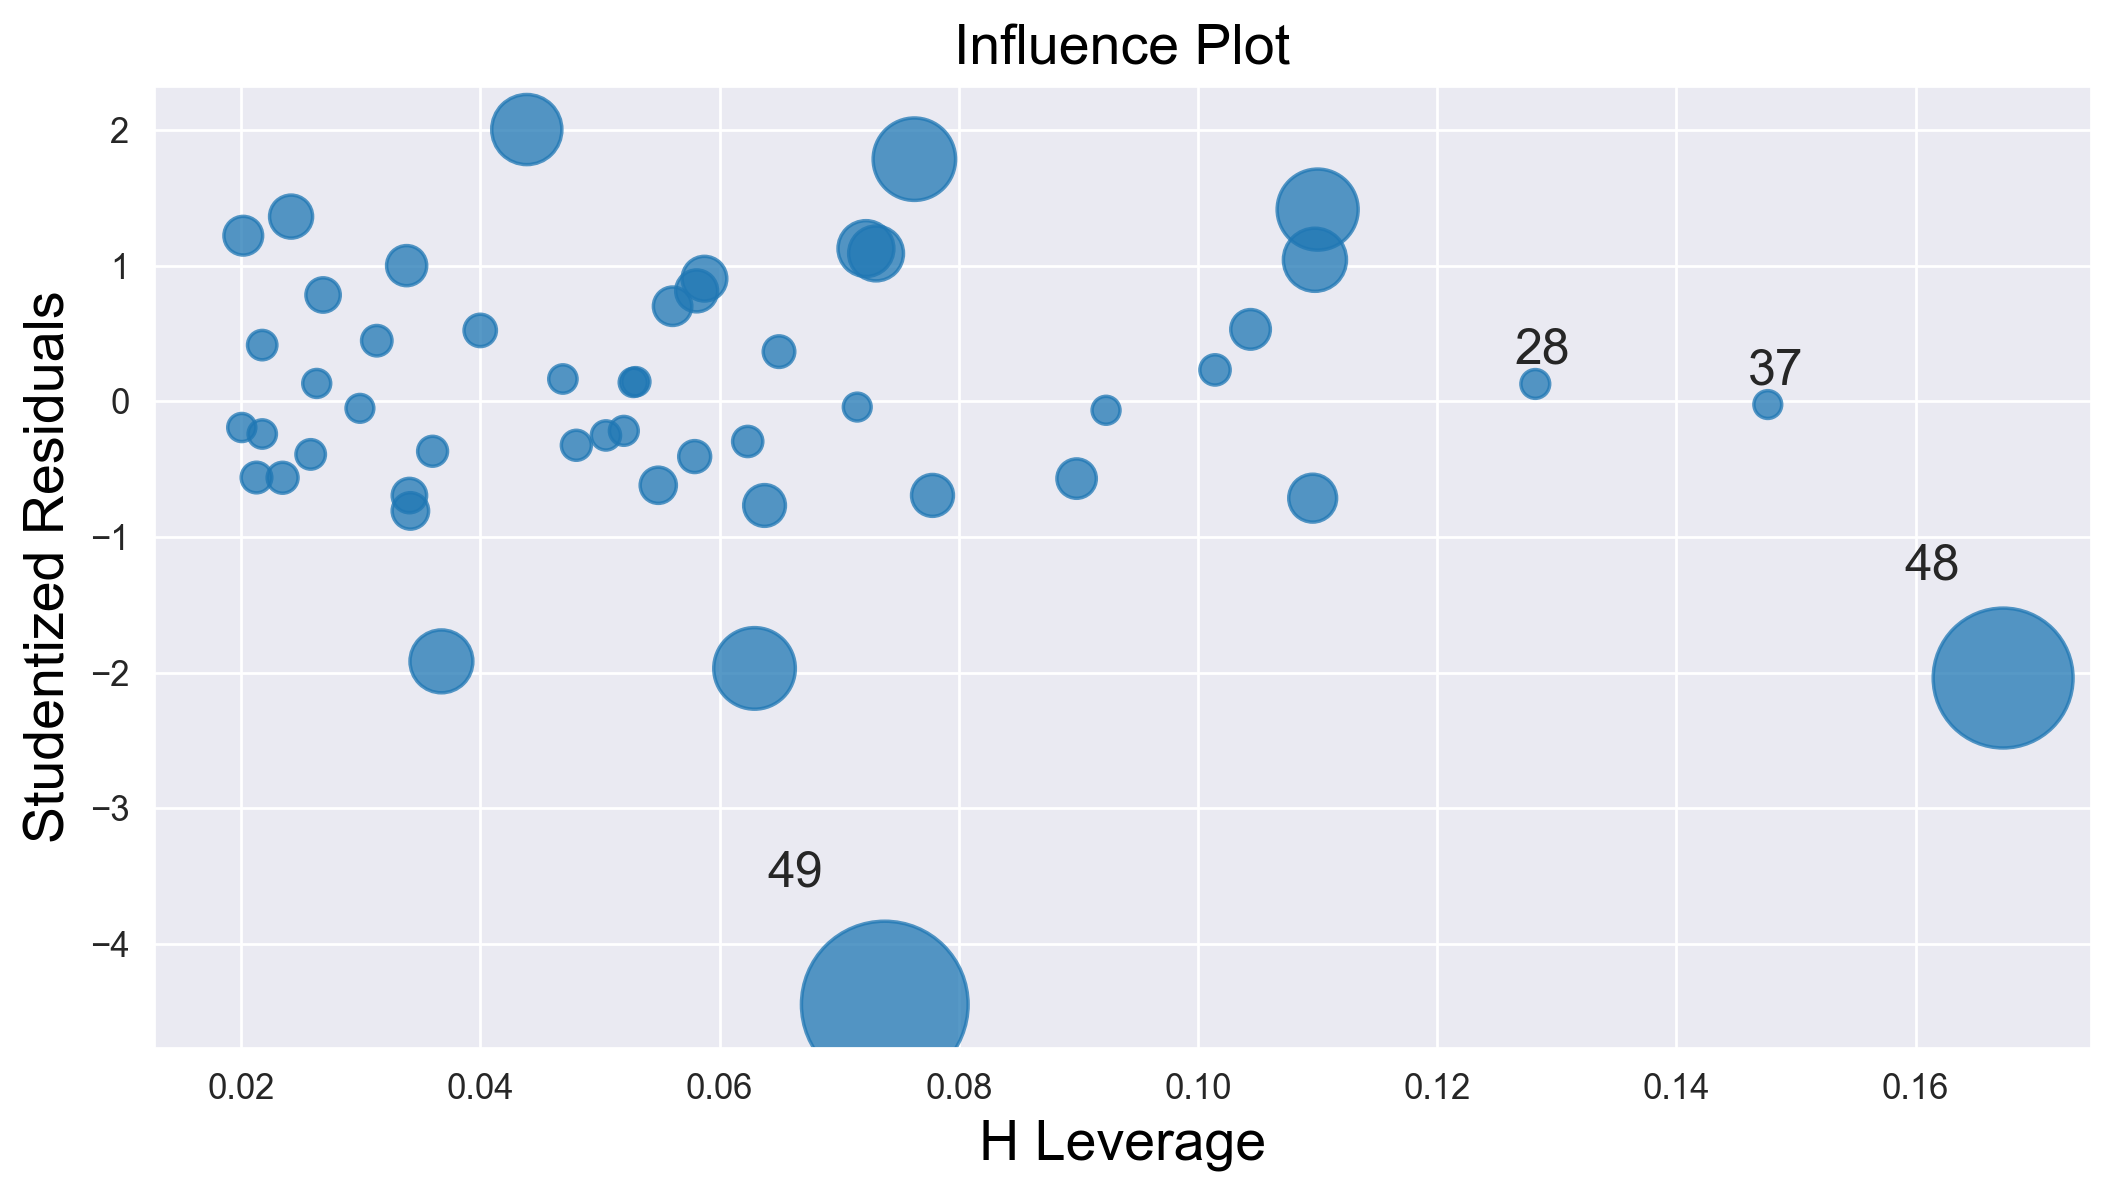

In [108]:
influence_plot(model);

In [109]:
df.iloc[[48]]

,RD_Spend,Administration,Marketing_Spend,Profit
48,542.05,51743.15,0.0,35673.41


# Improving the model

In [110]:
df.drop(index=47,inplace=True)
df.drop(index=48,inplace=True)
df.drop(index=49,inplace=True)

In [111]:
df

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [112]:
#reset the index

In [113]:
df.reset_index(inplace=True)

In [114]:
df.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit
42,42,23640.93,96189.63,148001.11,71498.49
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75


In [115]:
final_model = smf.ols('Profit~RD_Spend+Administration', data = df).fit()

In [116]:
final_model.rsquared

0.9592214016151974

# Predicting for new records

In [117]:
df.head()

,index,RD_Spend,Administration,Marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94


In [118]:
test = pd.DataFrame({
    'RD_Spend' : [158651.52,156166.65,156416.25],
    'Administration' : [451266.48,215454.88,152544.12]
    })

In [119]:
test

,RD_Spend,Administration
0,158651.52,451266.48
1,156166.65,215454.88
2,156416.25,152544.12


In [120]:
final_model.predict(test)

0    157025.489184
1    173284.351150
2    178364.830717
dtype: float64